In [1]:
# 0.  Package to use
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
np.random.seed(3)

In [3]:
# 1. Data set

# Trainging set & Test set
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [4]:
# Separate Training set &  Verification set
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [5]:
# Data set processing
x_train = x_train.reshape(50000,784).astype('float32') / 255.0
x_val = x_val.reshape(10000,784).astype('float32') / 255.0
x_test = x_test.reshape(10000,784).astype('float32') / 255.0

In [6]:
# Choose Trainin set & Verification set
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs = np.random.choice(10000,300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

In [7]:
# Label data One-hot encoding prcessing
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [8]:
# 2. Modeling
model = Sequential()
model.add(Dense(64, input_dim=28*28, activation='relu'))
model.add(Dense(10, activation='softmax'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
# 3. Model learning Process Setting
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])


Instructions for updating:
keep_dims is deprecated, use keepdims instead



순환신경망 모델인 경우는 fit 함수를 여러 번 호출하기 때문에 직접 콜백함수 만들어야함

In [13]:
# 4. Model learning 1000(range) x 1(epoch) 학습함 
from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping() # 증가 한 번만 해도 멈춤 -> 정확도가 좋다는 보장 없음
early_stopping = EarlyStopping(patience = 20) # 증가하더라도 20번은 기다려보자
# ModelCheckpoint() -> 매 에포크마다 학습된 가중치를 파일로 저장 가능
hist = model.fit(x_train, y_train, nb_epoch=3000, batch_size=10, validation_data=(x_val,y_val), callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s - loss: 0.3873 - acc: 0.9186 - val_loss: 0.5330 - val_acc: 0.8433
Epoch 2/3000
700/700 [==============================] - 0s - loss: 0.3642 - acc: 0.9257 - val_loss: 0.5128 - val_acc: 0.8567
Epoch 3/3000
700/700 [==============================] - 0s - loss: 0.3455 - acc: 0.9300 - val_loss: 0.5121 - val_acc: 0.8467
Epoch 4/3000
700/700 [==============================] - 0s - loss: 0.3298 - acc: 0.9286 - val_loss: 0.4988 - val_acc: 0.8533
Epoch 5/3000
700/700 [==============================] - 0s - loss: 0.3149 - acc: 0.9357 - val_loss: 0.4866 - val_acc: 0.8567
Epoch 6/3000
700/700 [==============================] - 0s - loss: 0.2998 - acc: 0.9400 - val_loss: 0.4844 - val_acc: 0.8533
Epoch 7/3000
700/700 [==============================] - 0s - loss: 0.2843 - acc: 0.9443 - val_loss: 0.4787 - val_acc: 0.8700
Epoch 8/3000
700/700 [==============================] - 0s - loss: 0.2761 - acc

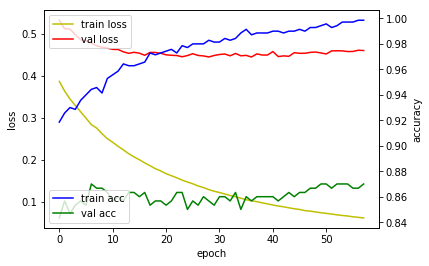

In [14]:
# 5. Looking learning processing(Have to use jupyter notebook)
%matplotlib inline
import matplotlib.pyplot as plt

loss_ax = plt.subplot()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['acc'],'b',label='train acc')
acc_ax.plot(hist.history['val_acc'],'g',label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [15]:
# 6. Model Evaluate
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

print ''
print 'loss : ' + str(loss_and_metrics[0])
print 'accuracy : ' + str(loss_and_metrics[1])

 9888/10000 [============================>.] - ETA: 0s
loss : 0.40418981346488
accuracy : 0.8799
